# SIN Stock Trading Game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

# Importing defined functions

from Functions import stock_df_create
from Functions import get_current_weights
from Functions import rebalance_portfolio
from Functions import additional_cash_investments

## 1 - Dataframe creation and stock selection

In [2]:
tkr_list = ['BTI', 'BYD', 'MO', 'SAM', 'STZ', 'LMT', 'LVS',
            'TAP', 'TDG', 'PEP', 'NOC', 'MGM', 'GD', 'BUD', 
            'BAESY', 'BDRBF', 'MNST', 'WYNN', 'RRR', 'RTX',
            'PM', 'CZR', 'HO.PA', 'RHM.DE', 'AIR', 'HEI', 'GTBIF',
            'CURLF', 'DKNG']

In [3]:
df = stock_df_create(tkr_list, start_date="2024-03-08", end_date="2024-04-08")
df.sort_values(by="TKR")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE
24,AIR,,2175578112,0.025722,-0.047907,61.410000
14,BAESY,,51343441920,-0.021053,0.035698,67.889999
15,BDRBF,,4278479616,0.020019,0.125321,43.820000
0,BTI,,66137944064,-0.029508,-0.001349,29.600000
13,BUD,,118182363136,-0.013491,-0.034150,59.959999
1,BYD,,6330677760,-0.017677,0.047023,66.129997
27,CURLF,,4102279936,0.048689,0.320755,5.600000
21,CZR,,9281432576,-0.018976,0.018514,42.910000
28,DKNG,,22451953664,0.039419,0.130810,47.200001
12,GD,,80987947008,0.044922,0.083985,295.179993


## 2 - Stock Weighting and Portfolio Construnction

### 2.1 Assigning Size and Momentum scores

In [4]:
scaler = MinMaxScaler()

market_cap_values = df['MKT_CAP'].values.reshape(-1, 1)
weekly_return_values = df['W_RET'].values.reshape(-1, 1)
monthly_return_values = df['M_RET'].values.reshape(-1,1)

df['Size_Score'] = scaler.fit_transform(market_cap_values)
df['W_Mom_Score'] = scaler.fit_transform(weekly_return_values)
df['M_Mom_Score'] = scaler.fit_transform(monthly_return_values)

### 2.2 Defining Scores Importance

In [5]:
mkt_cap_weight = 0.3
w_mom_weight = 0.3
m_mom_weight = 0.4

In [6]:
df['Overall_Score'] = (df['Size_Score'] * mkt_cap_weight) + (df['W_Mom_Score'] * w_mom_weight) + (df['M_Mom_Score'] * m_mom_weight)
df.sort_values(by="TKR")

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE,Size_Score,W_Mom_Score,M_Mom_Score,Overall_Score
24,AIR,,2175578112,0.025722,-0.047907,61.410000,0.000000,0.764860,0.019983,0.237451
14,BAESY,,51343441920,-0.021053,0.035698,67.889999,0.213486,0.332464,0.242230,0.260677
15,BDRBF,,4278479616,0.020019,0.125321,43.820000,0.009131,0.712133,0.480477,0.408570
0,BTI,,66137944064,-0.029508,-0.001349,29.600000,0.277724,0.254300,0.143747,0.217106
13,BUD,,118182363136,-0.013491,-0.034150,59.959999,0.503701,0.402363,0.056554,0.294441
1,BYD,,6330677760,-0.017677,0.047023,66.129997,0.018041,0.363671,0.272337,0.223449
27,CURLF,,4102279936,0.048689,0.320755,5.600000,0.008366,0.977167,1.000000,0.695660
21,CZR,,9281432576,-0.018976,0.018514,42.910000,0.030854,0.351663,0.196551,0.193375
28,DKNG,,22451953664,0.039419,0.130810,47.200001,0.088040,0.891470,0.495067,0.491880
12,GD,,80987947008,0.044922,0.083985,295.179993,0.342203,0.942343,0.370593,0.533601


### 2.3 Portfolio Construction

In [7]:
df['Weights_new'] = df['Overall_Score'] / df['Overall_Score'].sum()

Optimal_new_weights = df[['TKR', 'Weights_new', 'LAST_PRICE']]
Optimal_new_weights.sort_values(by="TKR")

,TKR,Weights_new,LAST_PRICE
24,AIR,0.024072,61.410000
14,BAESY,0.026427,67.889999
15,BDRBF,0.041420,43.820000
0,BTI,0.022010,29.600000
13,BUD,0.029850,59.959999
1,BYD,0.022653,66.129997
27,CURLF,0.070524,5.600000
21,CZR,0.019604,42.910000
28,DKNG,0.049866,47.200001
12,GD,0.054095,295.179993


### 2.4 Visual Representation

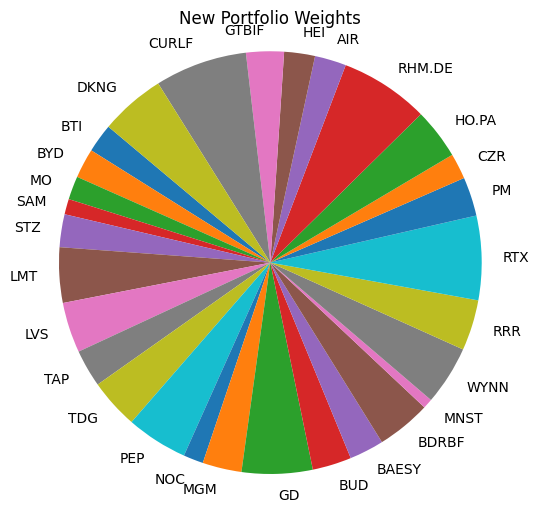

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(Optimal_new_weights['Weights_new'], labels=Optimal_new_weights['TKR'], startangle=140)
plt.title('New Portfolio Weights')
plt.axis('equal') 

plt.show()

## 3 - Portfolio Rebalancing

In [9]:
Cur_port = pd.read_csv("OpenPosition_4_8_2024.csv", header=0)
Cur_port.rename(columns={'Symbol': 'TKR'}, inplace=True)
Cur_port

,TKR,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage
0,AIR,European Aeronautic Defence and Space NV,38,EUR,168.02,166.418947,0.06,60.84,6384.760000,0.96
1,BAESY,BAE Systems plc - ADR,507,USD,67.89,68.670776,0.48,-365.57,31786.701759,-1.14
2,BDRBF,Bombardier Inc. - Ordinary Shares - Class B (S...,860,USD,43.82,42.163917,1.21,"1,315.26",34801.865448,3.93
3,BTI,British American Tobacco Plc - ADR,1083,USD,29.60,30.966214,-0.07,"-1,366.40",29604.100291,-4.41
4,BUD,Anheuser-Busch In Bev SA/NV - ADR,664,USD,59.96,60.371988,0.42,-252.63,36767.271552,-0.68
5,BYD,Boyd Gaming Corp.,562,USD,66.13,64.415730,0.47,889.71,34321.521910,2.66
6,CURLF,Curaleaf Holdings Inc,7896,USD,5.60,5.150053,0.39,"3,280.95",40834.464607,8.74
7,CZR,Caesars Entertainment Inc,826,USD,42.91,41.159564,0.58,"1,335.24",32731.828046,4.25
8,DKNG,DraftKings Inc - Ordinary Shares - Class A,408,USD,47.20,44.895765,1.83,868.20,17784.180634,5.13
9,GD,General Dynamics Corp.,123,USD,295.18,278.144172,1.96,"1,935.09",33529.242277,6.12


In [10]:
Cur_weights = get_current_weights(Cur_port)
Cur_weights = pd.DataFrame(Cur_weights.items(), columns=['TKR', 'Weights_cur'])
Cur_weights.loc[Cur_weights['TKR'] == 'HO', 'TKR'] = 'HO.PA'
Cur_weights.loc[Cur_weights['TKR'] == 'RHM', 'TKR'] = 'RHM.DE'
Cur_weights

,TKR,Weights_cur
0,AIR,0.005982
1,BAESY,0.032249
2,BDRBF,0.035308
3,BTI,0.030035
4,BUD,0.037302
5,BYD,0.034821
6,CURLF,0.041429
7,CZR,0.033208
8,DKNG,0.018043
9,GD,0.034017


In [11]:
trades, num_trades, traded_amount = rebalance_portfolio(Cur_weights, Optimal_new_weights, Cur_port)
print(f'To rebalace the portfolio {num_trades} trades will be needed, and a cash amount of {traded_amount} is necessary.')

To rebalace the portfolio 18 trades will be needed, and a cash amount of -101779.06341248078 is necessary.


In [12]:
trades

,TKR,Weights_cur,Weights_new,LAST_PRICE,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage,DollarAmount,DollarAmount_cur,DollarAmount_new,DollarAmount_diff,Shares_to_trade
0,AIR,0.005982,0.024072,61.410000,European Aeronautic Defence and Space NV,38.0,EUR,168.02,166.418947,0.06,60.84,6384.760000,0.96,6384.76,6384.76,23179.655850,16794.895850,100.0
3,BTI,0.030035,0.022010,29.600000,British American Tobacco Plc - ADR,1083.0,USD,29.60,30.966214,-0.07,"-1,366.40",29604.100291,-4.41,32056.80,32056.80,21193.608482,-10863.191518,-367.0
4,BUD,0.037302,0.029850,59.959999,Anheuser-Busch In Bev SA/NV - ADR,664.0,USD,59.96,60.371988,0.42,-252.63,36767.271552,-0.68,39813.44,39813.44,28742.915510,-11070.524490,-185.0
5,BYD,0.034821,0.022653,66.129997,Boyd Gaming Corp.,562.0,USD,66.13,64.415730,0.47,889.71,34321.521910,2.66,37165.06,37165.06,21812.758593,-15352.301407,-232.0
6,CURLF,0.041429,0.070524,5.600000,Curaleaf Holdings Inc,7896.0,USD,5.60,5.150053,0.39,"3,280.95",40834.464607,8.74,44217.60,44217.60,67909.390722,23691.790722,4231.0
7,CZR,0.033208,0.019604,42.910000,Caesars Entertainment Inc,826.0,USD,42.91,41.159564,0.58,"1,335.24",32731.828046,4.25,35443.66,35443.66,18877.030541,-16566.629459,-386.0
8,DKNG,0.018043,0.049866,47.200001,DraftKings Inc - Ordinary Shares - Class A,408.0,USD,47.20,44.895765,1.83,868.20,17784.180634,5.13,19257.60,19257.60,48016.652769,28759.052769,609.0
9,GD,0.034017,0.054095,295.179993,General Dynamics Corp.,123.0,USD,295.18,278.144172,1.96,"1,935.09",33529.242277,6.12,36307.14,36307.14,52089.413908,15782.273908,53.0
10,GTBIF,0.039141,0.028905,14.000000,Green Thumb Industries Inc - Ordinary Shares (...,2984.0,USD,14.00,13.332936,0.85,"1,838.22",38579.674008,5.00,41776.00,41776.00,27833.589440,-13942.410560,-996.0
13,LMT,0.049066,0.042265,455.380005,Lockheed Martin Corp.,115.0,USD,455.38,437.041652,1.34,"1,947.56",48361.915316,4.20,52368.70,52368.70,40697.932136,-11670.767864,-26.0


In [18]:
trades[['TKR', 'Shares_to_trade']]

,TKR,Shares_to_trade
0,AIR,100.0
3,BTI,-367.0
4,BUD,-185.0
5,BYD,-232.0
6,CURLF,4231.0
7,CZR,-386.0
8,DKNG,609.0
9,GD,53.0
10,GTBIF,-996.0
13,LMT,-26.0


In [13]:
merged_port = pd.merge(Cur_port, trades[['TKR', 'Shares_to_trade']], on='TKR', how='left')
merged_port['Shares_to_trade'].fillna(0, inplace=True)
merged_port['New_Quantity'] = merged_port['Quantity'] + merged_port['Shares_to_trade']

updated_portfolio = merged_port[['TKR', 'New_Quantity', 'LastPrice']]
updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()

updated_portfolio

/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_1755/2842246680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_1755/2842246680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()


,TKR,New_Quantity,LastPrice,DollarAmount,uptd_Weights
0,AIR,138.0,168.02,23186.76,0.024022
1,BAESY,507.0,67.89,34420.23,0.035660
2,BDRBF,860.0,43.82,37685.20,0.039043
3,BTI,716.0,29.60,21193.60,0.021957
4,BUD,479.0,59.96,28720.84,0.029756
5,BYD,330.0,66.13,21822.90,0.022609
6,CURLF,12127.0,5.60,67911.20,0.070358
7,CZR,440.0,42.91,18880.40,0.019561
8,DKNG,1017.0,47.20,48002.40,0.049732
9,GD,176.0,295.18,51951.68,0.053823


In [14]:
cash_rebalacing = additional_cash_investments(updated_portfolio, 100000)
cash_rebalacing

,TKR,Additional_Shares
0,AIR,14.0
1,BAESY,52.0
2,BDRBF,89.0
3,BTI,74.0
4,BUD,49.0
5,BYD,34.0
6,CURLF,1256.0
7,CZR,45.0
8,DKNG,105.0
9,GD,18.0


### 3.1 - Rebalancing Drift

In [15]:
merged_df = pd.merge(Optimal_new_weights, updated_portfolio, on='TKR', suffixes=('_optimal', '_updated'))

mean_difference = np.mean(merged_df['Weights_new'] - merged_df['uptd_Weights'])

print(mean_difference)

5.014156656937691e-05


A rebalancing drift of 0.058% is neglectable in the context of our portfolio management, indicating only a minor deviation from the target allocation. By implementing a weekly rebalancing strategy, we ensure that the portfolio weights remain consistently close to the desired allocation. While some minor rebalancing drift is inevitable due to market fluctuations, the frequency of rebalancing helps mitigate the impact of these deviations over time. 

Rebalancing Drifts data:

* 1st week: 0.058%
* 2nd week: 0.017%
* 3rd week: 0.005%

### 3.1 - Rebalancing Visualization

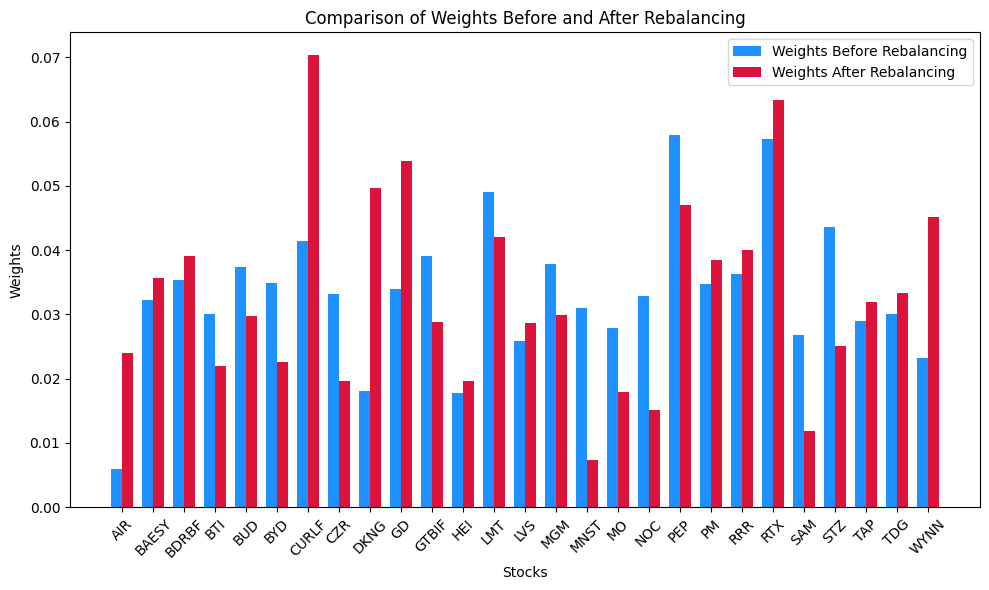

In [16]:
merged_weights = pd.merge(Cur_weights, updated_portfolio, on="TKR")

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(merged_weights))
tick_labels = merged_weights['TKR']

plt.bar(index, merged_weights['Weights_cur'], color='dodgerblue', width=bar_width, label='Weights Before Rebalancing')

plt.bar(index + bar_width, merged_weights['uptd_Weights'], color='crimson', width=bar_width, label='Weights After Rebalancing')

plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Comparison of Weights Before and After Rebalancing')
plt.xticks(index + bar_width / 2, tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

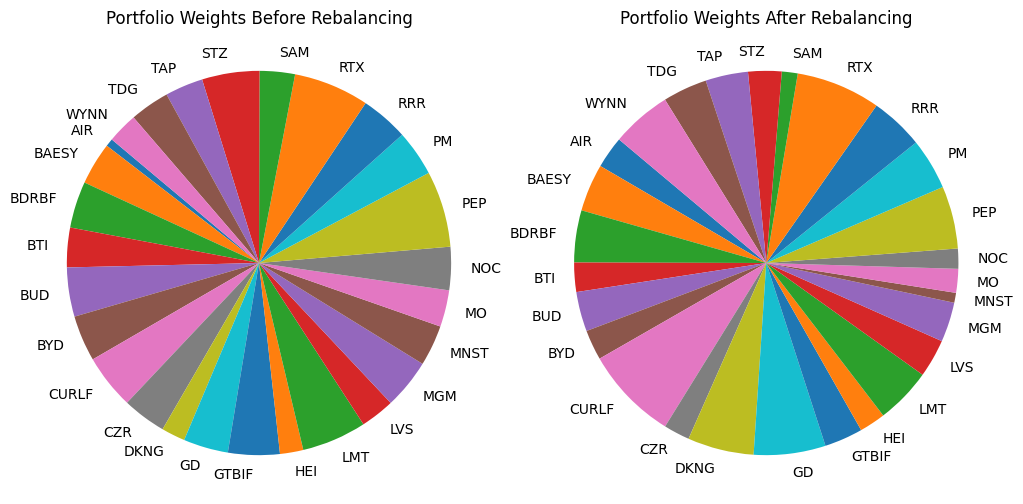

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(merged_weights['Weights_cur'], labels=merged_weights['TKR'], startangle=140)
axs[0].set_title('Portfolio Weights Before Rebalancing')
axs[0].axis('equal')

axs[1].pie(merged_weights['uptd_Weights'], labels=merged_weights['TKR'], startangle=140)
axs[1].set_title('Portfolio Weights After Rebalancing')
axs[1].axis('equal')

plt.show()

## 4 - Performance Evaluation

[*********************100%%**********************]  1 of 1 completed


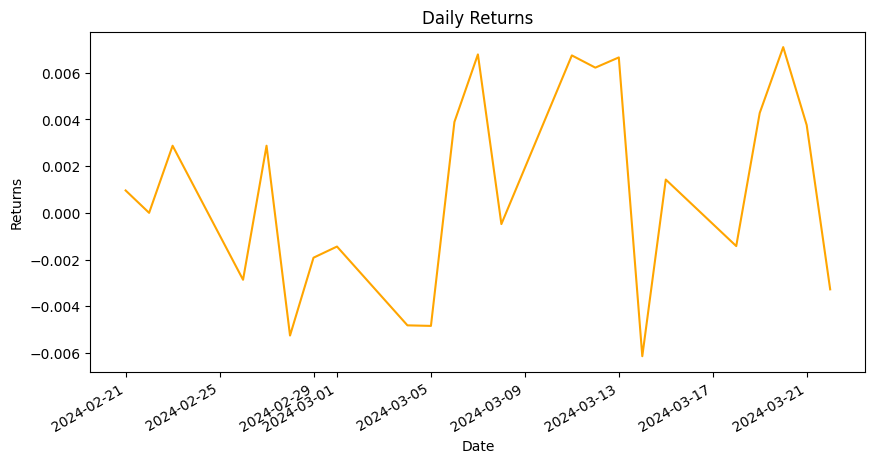

In [37]:
Benchmark = yf.download("VICEX", start="2024-02-19", end="2024-03-25") 
Benchmark['RET'] = Benchmark['Adj Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(Benchmark.index, Benchmark['RET'], color='orange', linestyle='-')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

plt.show()